In [27]:
import pandas as pd

In [28]:
# Read the Nvidia Historical Stock price from 2015 to 2025 daily stock price dataset

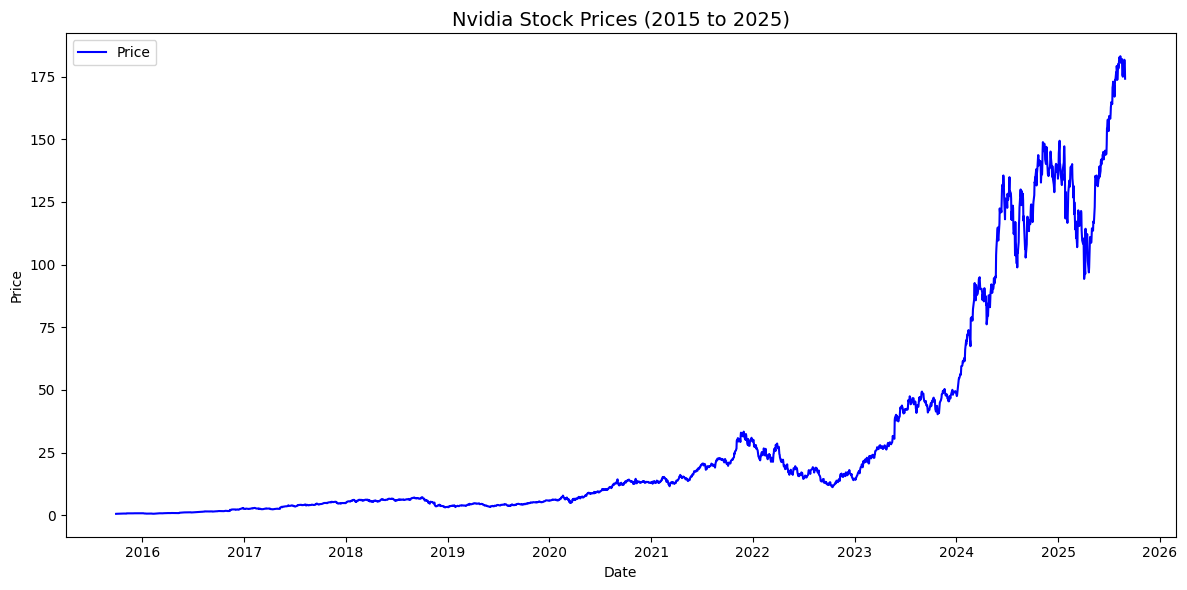

In [34]:

import matplotlib.pyplot as plt
# Save the reversed dataset
df=pd.read_csv('Nvidia Stock Price.csv')

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close/Last'], label='Price', color='blue')
plt.title('Nvidia Stock Prices (2015 to 2025)', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Next Check whether the dataset follows normal Time series or Financial Time series 

In [39]:
#Now we need only Close price this will be our train data till August 2025
X=df["Close/Last"]
print("Train Data", X)
#Now our test data will be of September 2025
df1=pd.read_csv("Nvidia Stock Price Test.csv")
Y=df1["Close/Last"]
print("Test data", Y)

Train Data 0         0.5928
1         0.6162
2         0.6043
3         0.6200
4         0.6355
          ...   
2490    179.8100
2491    181.7700
2492    181.6000
2493    180.1700
2494    174.1800
Name: Close/Last, Length: 2495, dtype: float64
Test data 0     170.78
1     170.62
2     171.66
3     167.02
4     168.31
5     170.76
6     177.33
7     177.17
8     177.82
9     177.75
10    174.88
11    170.29
12    176.24
13    176.67
14    183.61
15    178.43
16    176.97
17    177.69
18    178.19
Name: Close/Last, dtype: float64


Text(0.5, 1.0, 'ACF for absolute value')

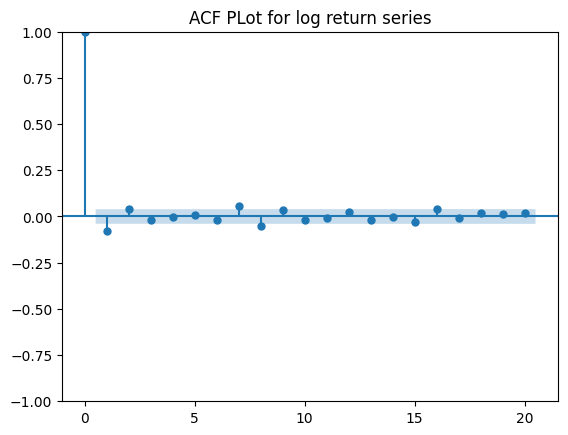

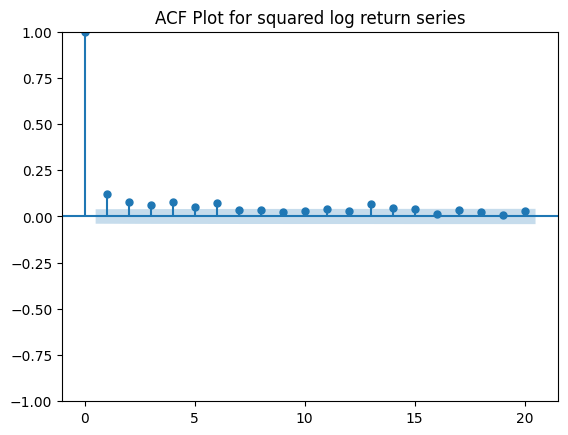

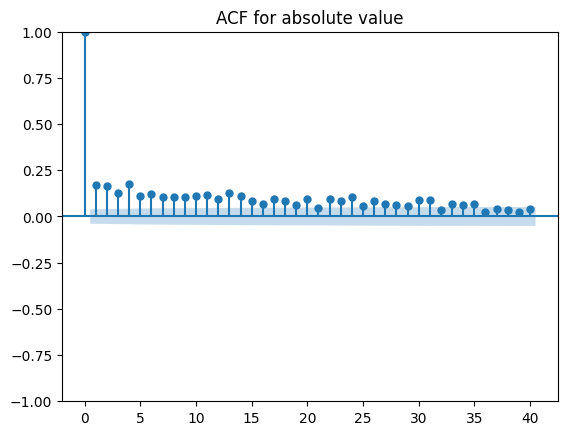

In [40]:
#Check the five Properties of financial time series
import numpy as np
L=np.log(X).diff()
LRS=L.dropna();LRS

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
#1
plot_acf(LRS,lags=20)
plt.title("ACF PLot for log return series")

#2
plot_acf(LRS**2,lags=20)
plt.title("ACF Plot for squared log return series")

#3
plot_acf(abs(LRS),lags=40)
plt.title("ACF for absolute value")




In [41]:
from scipy.stats import kurtosis
from statsmodels.stats.diagnostic import het_arch
#4
K=kurtosis(LRS)
print("Kurtosis Value",K)
#5
lm_stat, lm_pvalue, f_stat, f_pvalue=het_arch(LRS)
print("Arch effect is present or not",lm_pvalue)

Kurtosis Value 6.720080599180019
Arch effect is present or not 1.4544831924263215e-11


In [42]:
# Since it statisfies all the properties of Financial Time series we cannot continue with our classical Time series models
# we continue with our Financial Time series models

Text(0.5, 1.0, 'PACF PLOT FOR SQUARED LOG RETURN ')

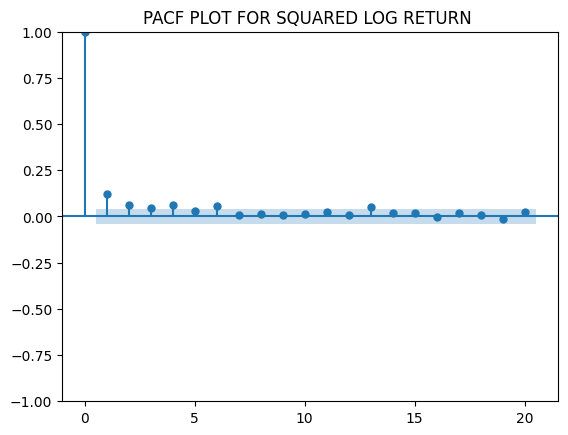

In [43]:
# First check the Order 
plot_pacf(LRS**2,lags=20)
plt.title("PACF PLOT FOR SQUARED LOG RETURN ")

In [44]:
from statsmodels.tsa.stattools import pacf
pacf_values=pacf(LRS**2,nlags=20)
#print
for lag, value in enumerate(pacf_values):
     print(f"Lag {lag}:{value}")

sig=1.96/np.sqrt(len(LRS));sig

Lag 0:1.0
Lag 1:0.1236691617528204
Lag 2:0.06259227474841998
Lag 3:0.0441415211520809
Lag 4:0.06267083839822969
Lag 5:0.027960043839143266
Lag 6:0.05615520927573492
Lag 7:0.009220863269873453
Lag 8:0.01611471186218443
Lag 9:0.0066317718964423004
Lag 10:0.014195374626350498
Lag 11:0.023633026574433894
Lag 12:0.010502196224145664
Lag 13:0.05240771982268292
Lag 14:0.021279015618098893
Lag 15:0.01726483911626154
Lag 16:-0.005282185947045662
Lag 17:0.017887039875546323
Lag 18:0.007810409629664492
Lag 19:-0.014139295894625573
Lag 20:0.021793269034847646


np.float64(0.03924712484170039)

In [45]:
# now we can confirm that our order p value is 4
#So now we will Fit Arch and Garch models
# We can fit ARCH(1), ARCH(2), ARCH(3), ARCH(4), GARCH(1,1), GARCH(1,2) and GARCH(2,1) models

In [46]:
from arch import arch_model
from statsmodels.stats.diagnostic import acorr_ljungbox
from scipy.stats import shapiro
#ARCH(1)
n=len(LRS)
F1=arch_model(LRS,p=1,q=0,rescale=False).fit()
E1=F1.resid/F1.conditional_volatility
LB1=acorr_ljungbox(E1,lags=[round(2*np.sqrt(n))]).lb_pvalue
S1=shapiro(E1).pvalue
AIC1=F1.aic
LB1.tolist()

#ARCH(2)
F2=arch_model(LRS,p=2,q=0,rescale=False).fit()
E2=F2.resid/F2.conditional_volatility
LB2=acorr_ljungbox(E2,lags=[round(2*np.sqrt(n))]).lb_pvalue
S2=shapiro(E2).pvalue
AIC2=F2.aic
LB2.tolist()

#ARCH(3)
F3=arch_model(LRS,p=3,q=0,rescale=False).fit()
E3=F3.resid/F3.conditional_volatility
LB3=acorr_ljungbox(E3,lags=[round(2*np.sqrt(n))]).lb_pvalue
S3=shapiro(E3).pvalue
AIC3=F3.aic
LB3.tolist()

#ARCH(4)
F4=arch_model(LRS,p=4,q=0,rescale=False).fit()
E4=F4.resid/F4.conditional_volatility
LB4=acorr_ljungbox(E4,lags=[round(2*np.sqrt(n))]).lb_pvalue
S4=shapiro(E4).pvalue
AIC4=F4.aic
LB4.tolist()

#GARCH(1,1)
F5=arch_model(LRS,p=1,q=1,rescale=False).fit()
E5=F5.resid/F5.conditional_volatility
LB5=acorr_ljungbox(E5,lags=[round(2*np.sqrt(n))]).lb_pvalue
S5=shapiro(E5).pvalue
AIC5=F5.aic
LB5.tolist()

#GARCH(1,2)
F6=arch_model(LRS,p=1,q=2,rescale=False).fit()
E6=F6.resid/F6.conditional_volatility
LB6=acorr_ljungbox(E6,lags=[round(2*np.sqrt(n))]).lb_pvalue
S6=shapiro(E6).pvalue
AIC6=F6.aic
LB6.tolist()

#GARCH(2,1)
F7=arch_model(LRS,p=2,q=1,rescale=False).fit()
E7=F7.resid/F7.conditional_volatility
LB7=acorr_ljungbox(E7,lags=[round(2*np.sqrt(n))]).lb_pvalue
S7=shapiro(E7).pvalue
AIC7=F7.aic
LB7.tolist()

data={"Model":["ARCH(1)","ARCH(2)","ARCH(3)","ARCH(4)","GARCH(1,1)","GARCH(1,2)","GARCH(2,2)"],
      "Ljung Box Pvalue":[LB1.tolist(),LB2.tolist(),LB3.tolist(),LB4.tolist(),LB5.tolist(),LB6.tolist(),LB7.tolist()],
      "Shapiro Pvalue":[S1,S2,S3,S4,S5,S6,S7],
      "AIC value":[AIC1,AIC2,AIC3,AIC4,AIC5,AIC6,AIC7]}

pd.DataFrame(data)


Iteration:      1,   Func. Count:      5,   Neg. LLF: 6461361146.094297
Iteration:      2,   Func. Count:     15,   Neg. LLF: -5025.611953431524
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5025.6119466392865
            Iterations: 6
            Function evaluations: 15
            Gradient evaluations: 2
Iteration:      1,   Func. Count:      6,   Neg. LLF: 47593771199.94288
Iteration:      2,   Func. Count:     18,   Neg. LLF: 11750978.253779726
Iteration:      3,   Func. Count:     30,   Neg. LLF: 337566320.3200825
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5088.522081435515
            Iterations: 4
            Function evaluations: 40
            Gradient evaluations: 3
Iteration:      1,   Func. Count:      7,   Neg. LLF: 36268350842.75064
Iteration:      2,   Func. Count:     20,   Neg. LLF: 694571.0570711666
Iteration:      3,   Func. Count:     33,   Neg. LLF: 18711117.75622707
Itera

Model       Ljung Box Pvalue  Shapiro Pvalue     AIC value
0     ARCH(1)   [0.2768724713102902]    1.792106e-30 -10045.223893
1     ARCH(2)   [0.2535127704168086]    1.925766e-30 -10169.044163
2     ARCH(3)   [0.3126880033221289]    2.465169e-30 -10191.223258
3     ARCH(4)  [0.37830895700402245]    3.337100e-29 -10257.349316
4  GARCH(1,1)   [0.5401204452527988]    2.073938e-30 -10450.453968
5  GARCH(1,2)   [0.5571118451017608]    7.935595e-31 -10435.589532
6  GARCH(2,2)   [0.5234884047772572]    1.865799e-30 -10443.421341

In [ ]:
# From the above table Highest Ljung Box pvalue is for GARCH(1,2) and Lowest AIC value 
# So our Good model will be GARCH(1,2)

In [ ]:
#Now we forecast the value and compare with test and train data set

In [51]:
# --- Step 3: Forecast volatility
forecast_horizon = 19  # since test has 19 values
forecast = F6.forecast(horizon=forecast_horizon)

# Get forecasted returns (mean) â€” use .mean
forecasted_returns = forecast.mean.iloc[-1]
last_price=float(str(df['Close/Last'].iloc[-1]).replace(",",""))
Cum=np.cumsum(forecasted_returns)
prd=last_price*np.exp(Cum)
#Predicted values
print("Predicted values",prd)


Predicted values h.01    174.728255
h.02    175.278237
h.03    175.829949
h.04    176.383398
h.05    176.938589
h.06    177.495527
h.07    178.054219
h.08    178.614669
h.09    179.176883
h.10    179.740867
h.11    180.306626
h.12    180.874166
h.13    181.443492
h.14    182.014611
h.15    182.587527
h.16    183.162246
h.17    183.738774
h.18    184.317118
h.19    184.897281
Name: 2494, dtype: float64


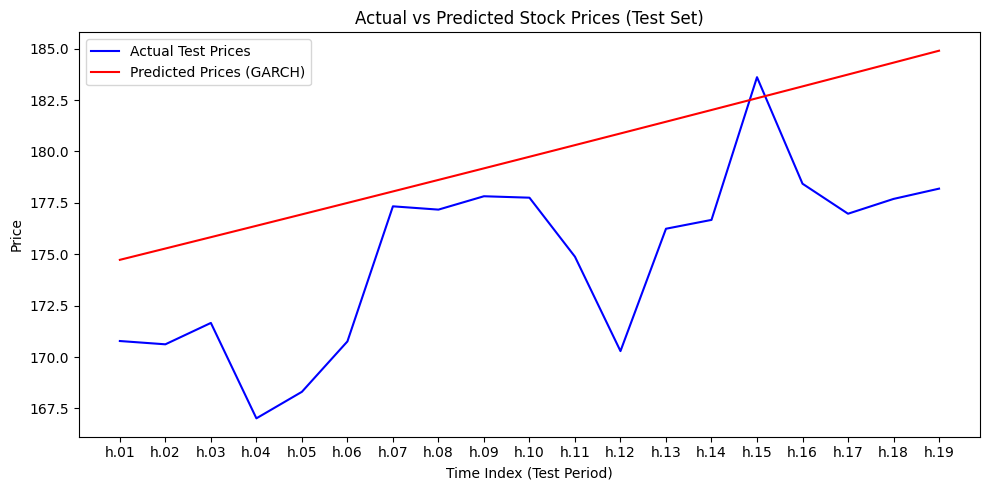

In [54]:
# Actual vs Predicted
actual = Y
predicted = prd

plt.figure(figsize=(10,5))
plt.plot(actual, label="Actual Test Prices", color='blue')
plt.plot(predicted, label="Predicted Prices (GARCH)", color='red')

plt.title("Actual vs Predicted Stock Prices (Test Set)")
plt.xlabel("Time Index (Test Period)")
plt.ylabel("Price")
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# Model accuracy

In [66]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

rmse = np.sqrt(mean_squared_error(actual, predicted))
mae = mean_absolute_error(actual, predicted)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

RMSE: 5.74
MAE: 5.02


In [ ]:
#Prophet model also cannot be used for stock data sets 
#so i will directly go for Machine learning model LSTM 